In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/booksdataset/Data_Train.xlsx


In [157]:
# libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import FeatureHasher

In [158]:
df = pd.read_excel('/kaggle/input/booksdataset/Data_Train.xlsx')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


In [160]:
df.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [161]:
df.tail(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
5689,Rejuvenate Yourself Abstract,Dreamland Publications,"Paperback,– 2017",4.6 out of 5 stars,121 customer reviews,“Rejuvenate Yourself-Abstract” is a Dreamland’...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",150.0
5690,The Penguin Classics Book,Henry Eliot,"Hardcover,– 24 Nov 2018",5.0 out of 5 stars,2 customer reviews,Penguin Classics is the largest and best-known...,Design,"Arts, Film & Photography",1109.0
5691,Dragon Ball Super - Vol. 4,Akira Toriyama,"Paperback,– 12 Mar 2019",5.0 out of 5 stars,4 customer reviews,Goku’s adventure from the best-selling classic...,Mangas,Comics & Mangas,398.0
5692,The Hunchback of Notre Dame,Victor Hugo,"Paperback,– Import, 11 Mar 2017",5.0 out of 5 stars,4 customer reviews,Outcast by society because of his hideous appe...,Action & Adventure (Books),Action & Adventure,999.0
5693,The Other Woman,Daniel Silva,"Paperback,– 7 Aug 2018",3.9 out of 5 stars,17 customer reviews,"From Daniel Silva, the No.1 New York Times bes...","Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",247.0
5694,Who Ordered This Truckload of Dung?: Inspiring...,Ajahn Brahm,"Paperback,– 30 Aug 2005",4.9 out of 5 stars,9 customer reviews,“Laugh your way to enlightenment” with this in...,Buddhism (Books),Humour,1009.0
5695,PostCapitalism: A Guide to Our Future,Paul Mason,"Paperback,– 2 Jun 2016",4.1 out of 5 stars,2 customer reviews,'The most important book about our economy and...,Macroeconomics Textbooks,Politics,781.0
5696,The Great Zoo Of China,Matthew Reilly,"Paperback,– 14 Jan 2016",4.1 out of 5 stars,28 customer reviews,The Chinese government has been keeping a secr...,Action & Adventure (Books),"Crime, Thriller & Mystery",449.0
5697,Engleby,Sebastian Faulks,"Paperback,– 27 Mar 2008",1.0 out of 5 stars,1 customer review,Mike Engleby has a secret...\n\nThis is the st...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",108.0
5698,Only Dull People Are Brilliant at Breakfast (P...,Oscar Wilde,"Paperback,– 3 Mar 2016",4.5 out of 5 stars,7 customer reviews,'It would be unfair to expect other people to ...,Essays (Books),Humour,99.0


# Univariate Variable Analysis

***----Author----***

In [162]:
unique_authors = df['Author'].nunique()
total_non_unique_authors = df[df['Author'].duplicated()].shape[0]
authors_with_multiple_rows = df['Author'][df['Author'].duplicated()].unique()
authors_with_single_row = df['Author'][~df['Author'].duplicated(keep=False)].unique()

print(f"Total Number of Non-Unique Authors: {total_non_unique_authors}")
print(f"Total Number of Unique Authors: {unique_authors}")
print("Authors with Multiple Rows:", authors_with_multiple_rows)
print("Authors with Single Row:", authors_with_single_row)

Total Number of Non-Unique Authors: 2261
Total Number of Unique Authors: 3438
Authors with Multiple Rows: ['Agatha Christie' 'HBR' 'P.G. Wodehouse' 'Bill Watterson' 'Ladybird'
 'David Baldacci' 'Bear Grylls' 'Ruskin Bond' 'Haruki Murakami'
 'John Grisham' 'Michael Crichton' 'James Clavell' 'Herge' 'Julia Cameron'
 'Daniel Silva' 'George R.R. Martin' 'DK' 'Hindol Sengupta'
 'Clive Cussler' 'Oliver Bowden' 'Wilbur Smith' 'Albert Uderzo'
 'Chris Kuzneski' 'Luis Fernandes' 'Sam Phillips' 'Ken Follett'
 'Sidney Sheldon' 'Masashi Kishimoto' 'ONE' 'Durjoy Datta'
 'Abhinav Chandrachud' 'Stephen King' 'Daniel J. Siegel'
 'Archie Superstars' 'Alistair MacLean' 'Frederic Delavier' 'Eiichiro Oda'
 'National Geographic' 'Kazuo Ishiguro' 'Marjane Satrapi' 'Rick Riordan'
 'Frank Miller' 'Brandon Sanderson' 'Julia Donaldson' 'Bipan Chandra'
 'A.P.J. Abdul Kalam' "Louis L'Amour" 'Robert Ludlum' 'Various'
 'Jim Davis' 'Bryan Peterson' 'Dav Pilkey' 'James Patterson'
 'Coomi Kapoor' 'Gregg Hurwitz' 'Dr. P

***----Reviews----***

In [163]:
df['Reviews_Score'] = df['Reviews'].str.extract(r'(\d+\.\d+)')
df['Reviews_Score'] = df['Reviews_Score'].astype(float)

First line uses the str.extract method with a regular expression (r'(\d+\.\d+)') to extract numeric scores with decimal points from the 'Reviews' column. The regular expression captures one or more digits before and after a decimal point. The extracted scores are then assigned to the new 'Reviews_Score' column.

Second line: After extracting the scores, this line converts the 'Reviews_Score' column to floating-point numbers using the astype(float) method. This ensures that the scores are stored as numerical values with decimal precision, allowing for mathematical operations or analysis.

In [164]:
df.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Reviews_Score
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5.0
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,4.5
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,4.4
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,4.7
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,4.2
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,4.0


As you can see, now we have a new column which shows us review score as a number.

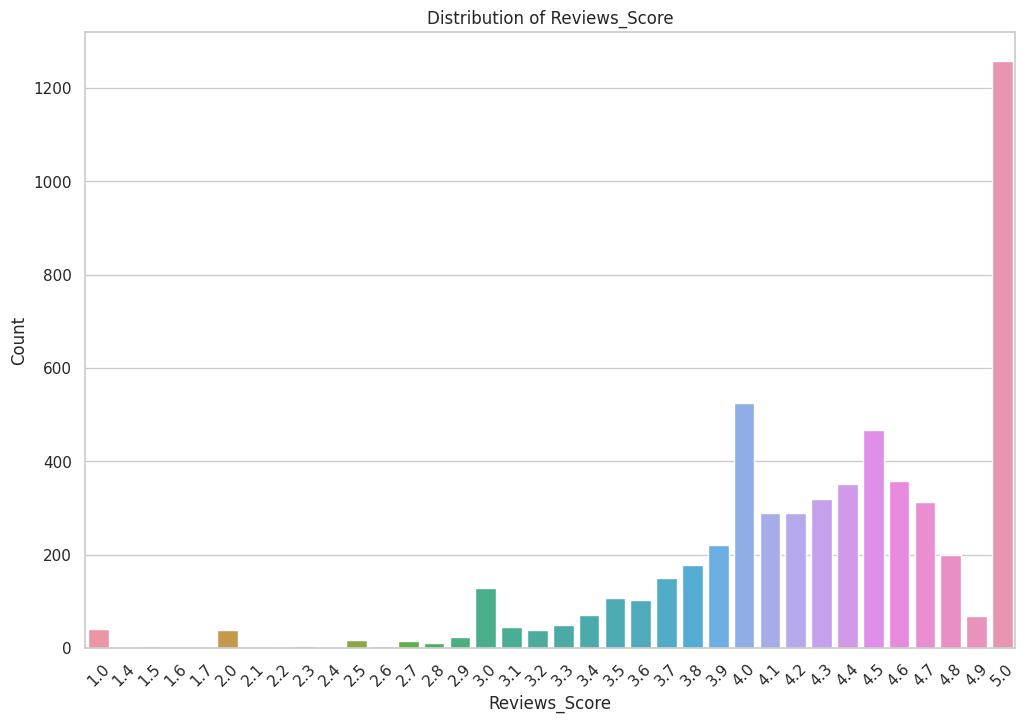

In [165]:
review_score = 'Reviews_Score'

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=review_score)

plt.xlabel(review_score)
plt.ylabel('Count')
plt.title(f'Distribution of {review_score}')
plt.xticks(rotation=45)
plt.show()

***----Editions----***

In [166]:
unique_editions = df['Edition'].unique()
print("Unique Editions:", unique_editions)
print("--------------------------------")
first_edition_split = unique_editions[0].split(',–')
print(first_edition_split[0])
print(first_edition_split[1])

Unique Editions: ['Paperback,– 10 Mar 2016' 'Paperback,– 7 Nov 2012'
 'Paperback,– 25 Feb 1982' ... 'Paperback,– Import, 25 Aug 2018'
 'Paperback,– Import, 11 Mar 2017' 'Paperback,– 30 Aug 2005']
--------------------------------
Paperback
 10 Mar 2016


Here, df['Edition'].unique() is used to get an array of unique values in the 'Edition' column of the DataFrame. This array is then printed using print(unique_editions). This line helps you see the unique editions present in the 'Edition' column.

In 2 other lines, it takes the first unique edition (assuming there is at least one) from the array and splits it using the split(',–') method. The ',–' is used as the delimiter for the split. The result is a list of substrings obtained by splitting the first edition.

Finally, it prints the first element of the split result with print(first_edition_split[0]). This line seems to be extracting a part of the edition information, specifically the first part before the ',–' delimiter.

In [167]:
split_data = df['Edition'].str.split(',–', expand=True)

As a result, if the 'Edition' column contains values like "Paperback,_10 Mar 2016", this line of code would create a DataFrame where each row has two columns - the first column contains "Paperback" and the second column contains "10 Mar 2016". The column names in the resulting DataFrame would be 0 and 1.

In [168]:
df['Edition_Date'] = split_data[1]
df['Edition_Cover'] = split_data[0]

   df['Edition_Date'] = split_data[1]: This line creates a new column in the DataFrame called 'Edition_Date' and assigns the values from the second column (index 1) of the split_data DataFrame to it. This assumes that the second column of split_data contains information about dates.

   df['Edition_Cover'] = split_data[0]: Similarly, this line creates a new column in the DataFrame called 'Edition_Cover' and assigns the values from the first column (index 0) of the split_data DataFrame to it. This assumes that the first column of split_data contains information about the cover type or edition details.

-------------

In [169]:
df['Edition_Date'] = df['Edition_Date'].astype(str)
df['Year'] = df['Edition_Date'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

print(df[['Edition_Date', 'Year']])

      Edition_Date    Year
0      10 Mar 2016  2016.0
1       7 Nov 2012  2012.0
2      25 Feb 1982  1982.0
3       5 Oct 2017  2017.0
4      10 Oct 2006  2006.0
...            ...     ...
5694   30 Aug 2005  2005.0
5695    2 Jun 2016  2016.0
5696   14 Jan 2016  2016.0
5697   27 Mar 2008  2008.0
5698    3 Mar 2016  2016.0

[5699 rows x 2 columns]


In [170]:
df['Year'].fillna(-1, inplace=True) 
df['Year'] = df['Year'].astype(int)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          5699 non-null   object 
 1   Author         5699 non-null   object 
 2   Edition        5699 non-null   object 
 3   Reviews        5699 non-null   object 
 4   Ratings        5699 non-null   object 
 5   Synopsis       5699 non-null   object 
 6   Genre          5699 non-null   object 
 7   BookCategory   5699 non-null   object 
 8   Price          5699 non-null   float64
 9   Reviews_Score  5699 non-null   float64
 10  Edition_Date   5699 non-null   object 
 11  Edition_Cover  5699 non-null   object 
 12  Year           5699 non-null   int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 578.9+ KB


--------

In [172]:
df['Edition_Date'] = pd.to_datetime(df['Edition_Date'], errors='coerce')

Here we convert the values in the 'Edition_Date' column of df to datetime objects. The errors='coerce' parameter is used to handle errors by converting problematic values to NaT (Not a Time) values. This ensures that valid dates are represented as datetime objects, while invalid or unconvertible values are replaced with NaT.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          5699 non-null   object        
 1   Author         5699 non-null   object        
 2   Edition        5699 non-null   object        
 3   Reviews        5699 non-null   object        
 4   Ratings        5699 non-null   object        
 5   Synopsis       5699 non-null   object        
 6   Genre          5699 non-null   object        
 7   BookCategory   5699 non-null   object        
 8   Price          5699 non-null   float64       
 9   Reviews_Score  5699 non-null   float64       
 10  Edition_Date   4608 non-null   datetime64[ns]
 11  Edition_Cover  5699 non-null   object        
 12  Year           5699 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 578.9+ KB


Now we can see our changes in dataset. 

lets take a look at first rows:

In [174]:
df.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Reviews_Score,Edition_Date,Edition_Cover,Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4.0,2016-03-10,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,2012-11-07,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,1982-02-25,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,2017-10-05,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5.0,2006-10-10,Hardcover,2006
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,4.5,2009-05-05,Paperback,2009
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,4.4,2017-10-05,Paperback,2017
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,4.7,NaT,Hardcover,2018
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,4.2,2015-12-15,Paperback,2015
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,4.0,2013-03-26,Paperback,2013


In [175]:
df['Edition_Date'] = pd.to_datetime(df['Edition_Date'], errors='coerce')

df['Year_Month'] = df['Edition_Date'].dt.to_period('M')

# Print the DataFrame with 'Edition_Date', 'Year_Month'
print(df[['Edition_Date', 'Year_Month']])

     Edition_Date Year_Month
0      2016-03-10    2016-03
1      2012-11-07    2012-11
2      1982-02-25    1982-02
3      2017-10-05    2017-10
4      2006-10-10    2006-10
...           ...        ...
5694   2005-08-30    2005-08
5695   2016-06-02    2016-06
5696   2016-01-14    2016-01
5697   2008-03-27    2008-03
5698   2016-03-03    2016-03

[5699 rows x 2 columns]


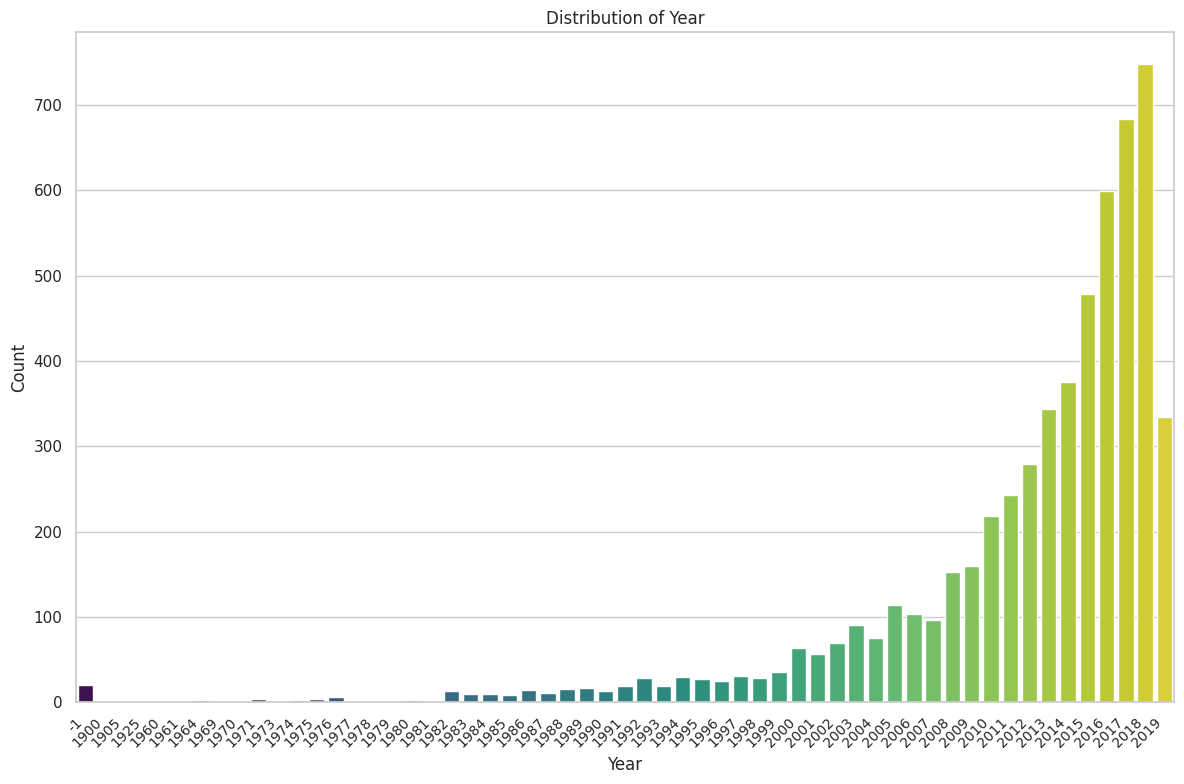

In [176]:
#df['Edition_Date'] = pd.to_datetime(df['Edition_Date'], errors='coerce')
#df['Year'] = df['Edition_Date'].dt.year

# Plot the distribution of the 'Year' column
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Year', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Rotate labels for better readability
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.tight_layout()
plt.show()

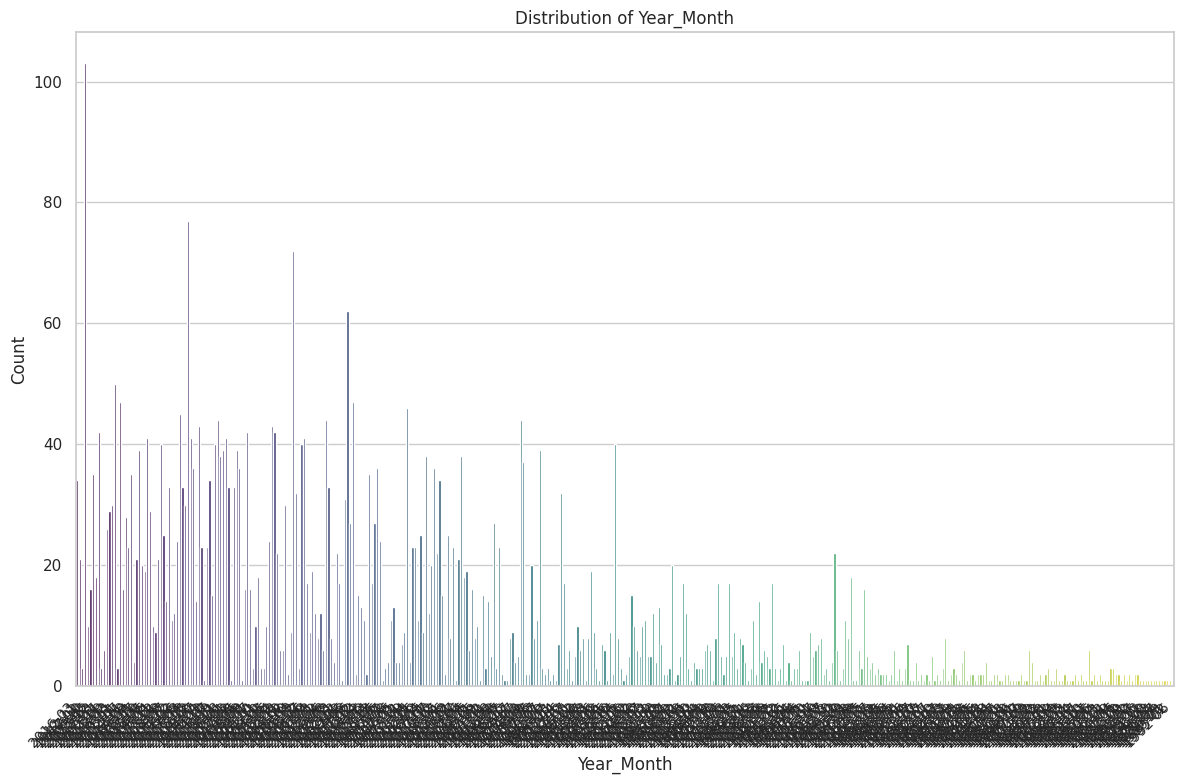

In [177]:
column_name = 'Year_Month'

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x=column_name, palette='viridis')  # You can choose a different color palette

plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Distribution of {column_name}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          5699 non-null   object        
 1   Author         5699 non-null   object        
 2   Edition        5699 non-null   object        
 3   Reviews        5699 non-null   object        
 4   Ratings        5699 non-null   object        
 5   Synopsis       5699 non-null   object        
 6   Genre          5699 non-null   object        
 7   BookCategory   5699 non-null   object        
 8   Price          5699 non-null   float64       
 9   Reviews_Score  5699 non-null   float64       
 10  Edition_Date   4608 non-null   datetime64[ns]
 11  Edition_Cover  5699 non-null   object        
 12  Year           5699 non-null   int64         
 13  Year_Month     4608 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(9), period[M](1)
memo

In [179]:
unique_values_in_Edition_Cover = df['Edition_Cover'].unique()
print("Unique Values in Edition_Cover",unique_values_in_Edition_Cover)

Unique Values in Edition_Cover ['Paperback' 'Hardcover' 'Mass Market Paperback' 'Sheet music'
 'Flexibound' 'Plastic Comb' 'Loose Leaf' 'Tankobon Softcover'
 'Perfect Paperback' 'Board book' 'Cards' 'Spiral-bound'
 '(Kannada),Paperback' 'Product Bundle' 'Library Binding'
 '(German),Paperback' 'Leather Bound' '(French),Paperback']


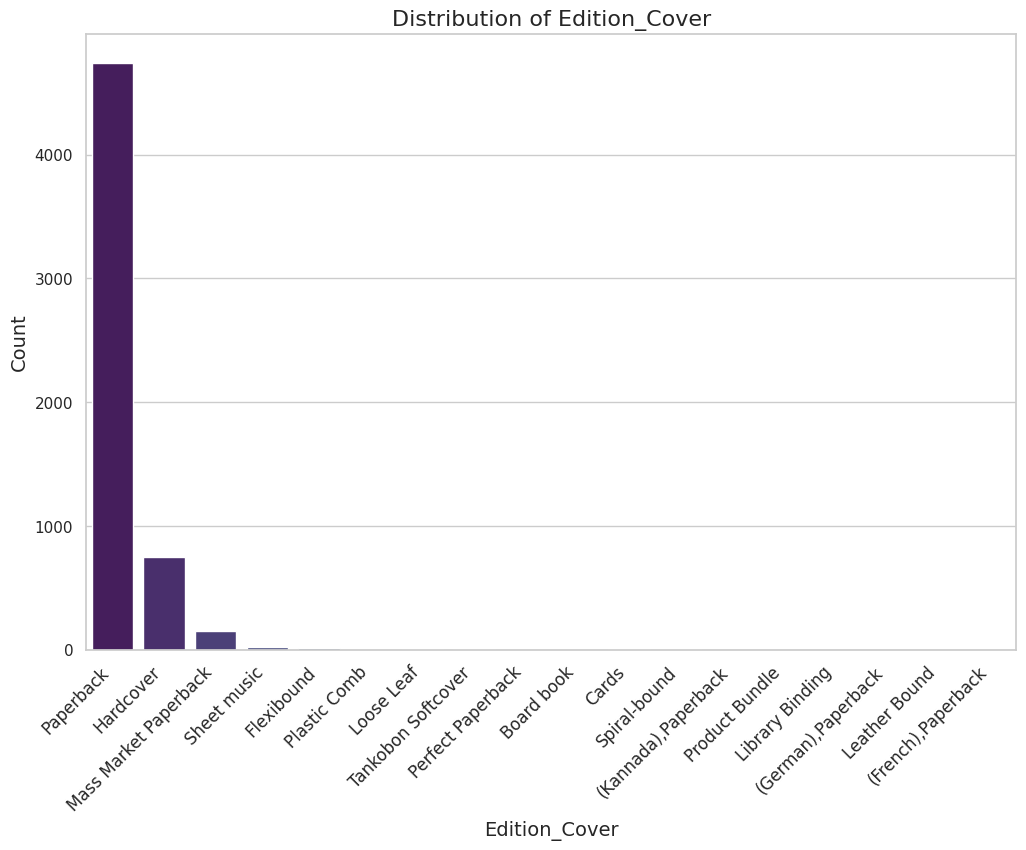

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

column_name = 'Edition_Cover'

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  

# Use sns.countplot and specify data and x-axis variable
ax = sns.countplot(data=df, x=column_name, palette='viridis')

ax.set_xlabel(column_name, fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title(f'Distribution of {column_name}', fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

plt.show()

In [181]:
value_counts = df['Edition_Cover'].value_counts()
value_counts

Edition_Cover
Paperback                4741
Hardcover                 750
Mass Market Paperback     148
Sheet music                22
Flexibound                 14
Cards                       7
Spiral-bound                4
Loose Leaf                  2
Tankobon Softcover          2
Product Bundle              1
Leather Bound               1
(German),Paperback          1
Library Binding             1
Board book                  1
(Kannada),Paperback         1
Perfect Paperback           1
Plastic Comb                1
(French),Paperback          1
Name: count, dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          5699 non-null   object        
 1   Author         5699 non-null   object        
 2   Edition        5699 non-null   object        
 3   Reviews        5699 non-null   object        
 4   Ratings        5699 non-null   object        
 5   Synopsis       5699 non-null   object        
 6   Genre          5699 non-null   object        
 7   BookCategory   5699 non-null   object        
 8   Price          5699 non-null   float64       
 9   Reviews_Score  5699 non-null   float64       
 10  Edition_Date   4608 non-null   datetime64[ns]
 11  Edition_Cover  5699 non-null   object        
 12  Year           5699 non-null   int64         
 13  Year_Month     4608 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(9), period[M](1)
memo

In [183]:
# Convert 'Edition_Date' column to string
#df['Edition_Date'] = df['Edition_Date'].astype(str)

# Extract year using regular expression and create a new 'Year' column
#df['Year'] = df['Edition_Date'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)

# Convert 'Year' column to numeric, coercing errors to NaN
#df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Print the 'Edition_Date' and 'Year' columns
#print(df[['Edition_Date', 'Year']])

The provided code converts the 'Edition_Date' column in the DataFrame `df` to strings, extracts four-digit years using a regular expression, and creates a new 'Year' column with the extracted years. The 'Year' column is then converted to numeric values, with errors coerced to NaN. This process is designed to extract and convert year information from the 'Edition_Date' column, and the resulting DataFrame displays both the original 'Edition_Date' values and the extracted 'Year' values, with non-numeric or missing values represented as NaN.

In [184]:
#df['Edition_Date'] = pd.to_datetime(df['Edition_Date'], errors='coerce')

#df['Year'] = df['Edition_Date'].dt.year
#df['Month'] = df['Edition_Date'].dt.month_name()

# Print the DataFrame with 'Edition_Date', 'Year', and 'Month'
#print(df[['Edition_Date', 'Year', 'Month']])

In [185]:
#df.info()

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          5699 non-null   object        
 1   Author         5699 non-null   object        
 2   Edition        5699 non-null   object        
 3   Reviews        5699 non-null   object        
 4   Ratings        5699 non-null   object        
 5   Synopsis       5699 non-null   object        
 6   Genre          5699 non-null   object        
 7   BookCategory   5699 non-null   object        
 8   Price          5699 non-null   float64       
 9   Reviews_Score  5699 non-null   float64       
 10  Edition_Date   4608 non-null   datetime64[ns]
 11  Edition_Cover  5699 non-null   object        
 12  Year           5699 non-null   int64         
 13  Year_Month     4608 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(9), period[M](1)
memo

Now we do not need Edition column anymore. So we drop it:

In [187]:
df.drop(columns=['Edition'], inplace=True)

****----BookCategory and Genre----****

In [188]:
unique_values_in_column = df['Genre'].unique()
print("Number of unique values of Genre:",len(unique_values_in_column))
print(" ")
print("Unique values of Genre",unique_values_in_column)

Number of unique values of Genre: 335
 
Unique values of Genre ['Action & Adventure (Books)' 'Cinema & Broadcast (Books)'
 'International Relations' 'Contemporary Fiction (Books)'
 'Photography Textbooks' 'Healthy Living & Wellness (Books)'
 'Crime, Thriller & Mystery (Books)' 'Sports Training & Coaching (Books)'
 'Biographies & Autobiographies (Books)' 'Asian History' 'Banks & Banking'
 'Comics & Mangas (Books)' "Children's Mysteries & Curiosities (Books)"
 'Mangas' 'Artificial Intelligence'
 'Software & Business Applications (Books)' 'German'
 'International Business' 'Cricket (Books)'
 'Comics & Graphic Novels (Books)' 'PC & Video Games (Books)'
 'Short Stories (Books)' 'Astrology' 'Romance (Books)' 'Design'
 'Introductory & Beginning Programming' 'Travel (Books)' 'Sports (Books)'
 'Communications' 'Foreign Languages' 'Linguistics (Books)' 'Music Books'
 'Outdoor Survival Skills (Books)' 'True Accounts (Books)' 'Literature'
 'Society & Culture (Books)' 'Industries & Business Sectors

In [189]:
unique_values_in_column = df['BookCategory'].unique()
print("Number of unique values of BookCategory:",len(unique_values_in_column))
print(" ")
print(unique_values_in_column)

Number of unique values of BookCategory: 11
 
['Action & Adventure' 'Biographies, Diaries & True Accounts' 'Humour'
 'Crime, Thriller & Mystery' 'Arts, Film & Photography' 'Sports'
 'Language, Linguistics & Writing' 'Computing, Internet & Digital Media'
 'Romance' 'Comics & Mangas' 'Politics']


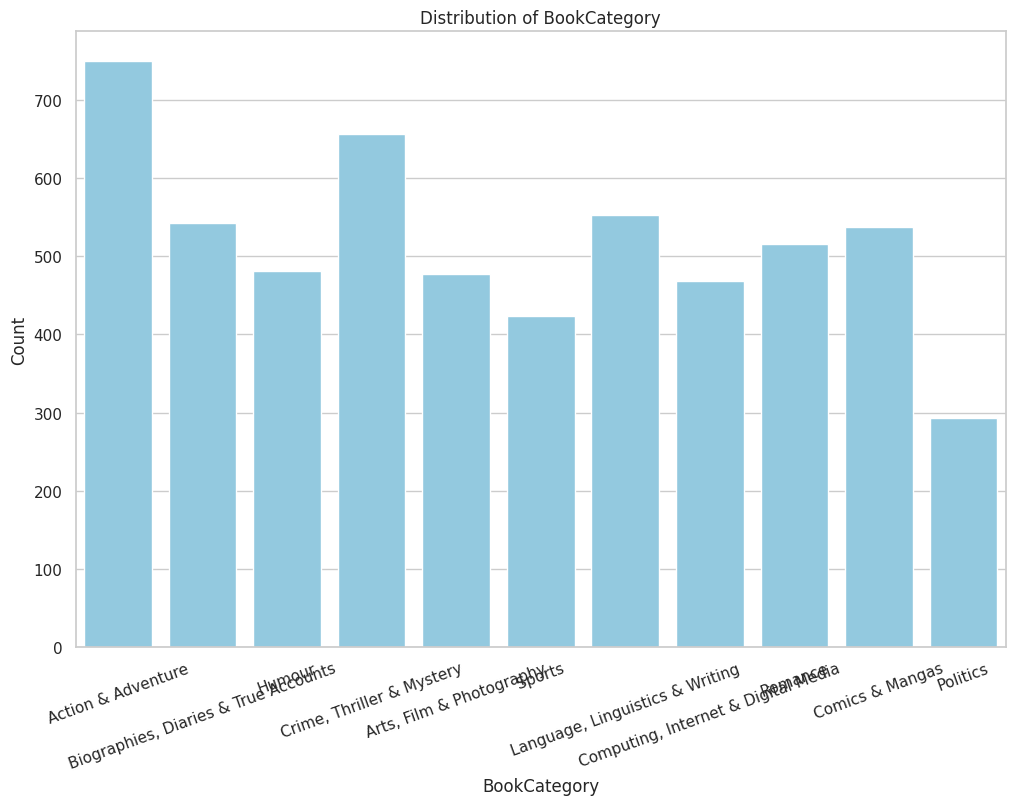

In [190]:
column_name = 'BookCategory'

plt.figure(figsize=(12, 8))

sns.countplot(data=df, x=column_name, color='skyblue')

plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Distribution of {column_name}')
plt.xticks(rotation=20)
plt.show()

In [191]:
df.drop(columns=['Genre'], inplace=True)

df.head(10)

,Title,Author,Reviews,Ratings,Synopsis,BookCategory,Price,Reviews_Score,Edition_Date,Edition_Cover,Year,Year_Month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,4.0,2016-03-10,Paperback,2016,2016-03
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,3.9,2012-11-07,Paperback,2012,2012-11
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",Humour,299.00,4.8,1982-02-25,Paperback,1982,1982-02
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,4.1,2017-10-05,Paperback,2017,2017-10
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,5.0,2006-10-10,Hardcover,2006,2006-10
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Sports,900.00,4.5,2009-05-05,Paperback,2009,2009-05
6,Death on the Nile (Poirot),Agatha Christie,4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery",224.00,4.4,2017-10-05,Paperback,2017,2017-10
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports,836.00,4.7,NaT,Hardcover,2018,NaT
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,"Biographies, Diaries & True Accounts",130.00,4.2,2015-12-15,Paperback,2015,2015-12
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure,695.00,4.0,2013-03-26,Paperback,2013,2013-03


***----Ratings----***

In [192]:
df['Ratings_Number'] = df['Ratings'].str.extract(r'(\d+)')
df['Ratings_Number'] = pd.to_numeric(df['Ratings_Number'], errors='coerce', downcast='integer')

First line uses the str.extract method with a regular expression (r'(\d+)') to extract the numeric part (digits) from the 'Ratings' column. The regular expression captures one or more digits. The extracted numeric ratings are then assigned to the new 'Ratings_Number' column.

Second line converts the 'Ratings_Number' column to numeric values using pd.to_numeric. The errors='coerce' parameter is used to replace any non-numeric values with NaN, and the downcast='integer' parameter is used to downcast the resulting float values to integers. This is useful if the ratings are whole numbers.

we don't need Ratings column anymore, so we drop it:

In [193]:
df.drop(columns=['Ratings'], inplace=True)

In [194]:
df.head()

,Title,Author,Reviews,Synopsis,BookCategory,Price,Reviews_Score,Edition_Date,Edition_Cover,Year,Year_Month,Ratings_Number
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,4.0,2016-03-10,Paperback,2016,2016-03,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,3.9,2012-11-07,Paperback,2012,2012-11,14
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,"""During the time men live without a common Pow...",Humour,299.00,4.8,1982-02-25,Paperback,1982,1982-02,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,4.1,2017-10-05,Paperback,2017,2017-10,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,5.0,2006-10-10,Hardcover,2006,2006-10,1


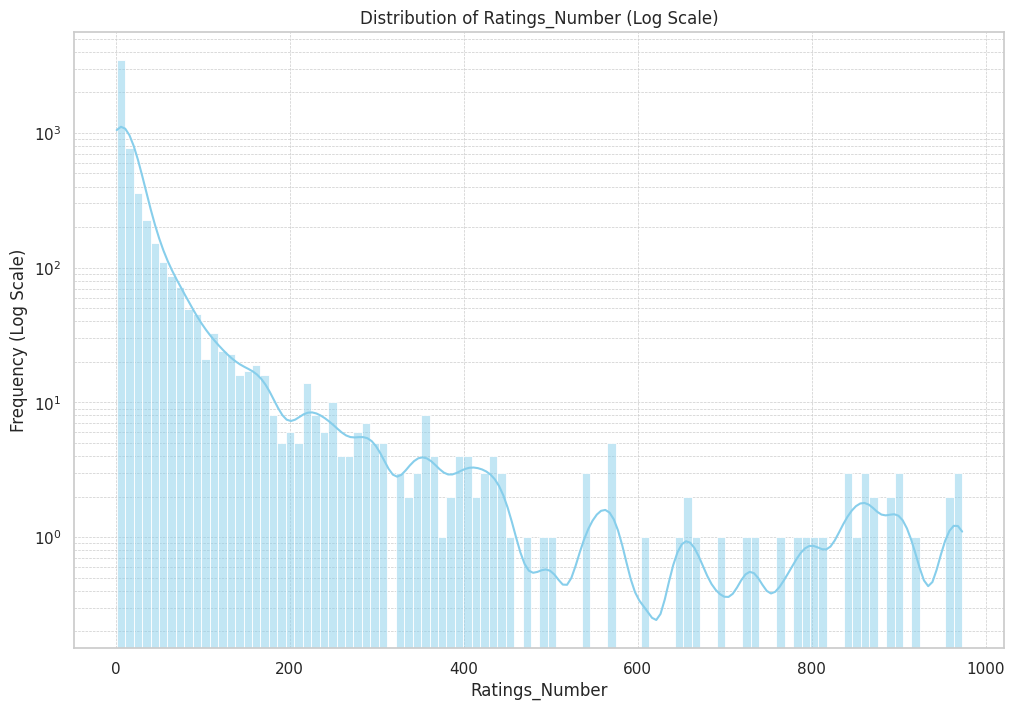

In [195]:
plt.figure(figsize=(12, 8))

sns.histplot(df['Ratings_Number'], bins=100, color='skyblue', kde=True, log_scale=(False, True))

plt.title('Distribution of Ratings_Number (Log Scale)')
plt.xlabel('Ratings_Number')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


***----New feature with rating and score----***

We can make a new feature using "Rating Number" and "Reviews_Score"

In [196]:
df['popularity'] = df['Ratings_Number'] * df['Reviews_Score']

# Display the DataFrame with the new feature
print(df[['Ratings_Number', 'Reviews_Score', 'popularity']])

      Ratings_Number  Reviews_Score  popularity
0                  8            4.0        32.0
1                 14            3.9        54.6
2                  6            4.8        28.8
3                 13            4.1        53.3
4                  1            5.0         5.0
...              ...            ...         ...
5694               9            4.9        44.1
5695               2            4.1         8.2
5696              28            4.1       114.8
5697               1            1.0         1.0
5698               7            4.5        31.5

[5699 rows x 3 columns]


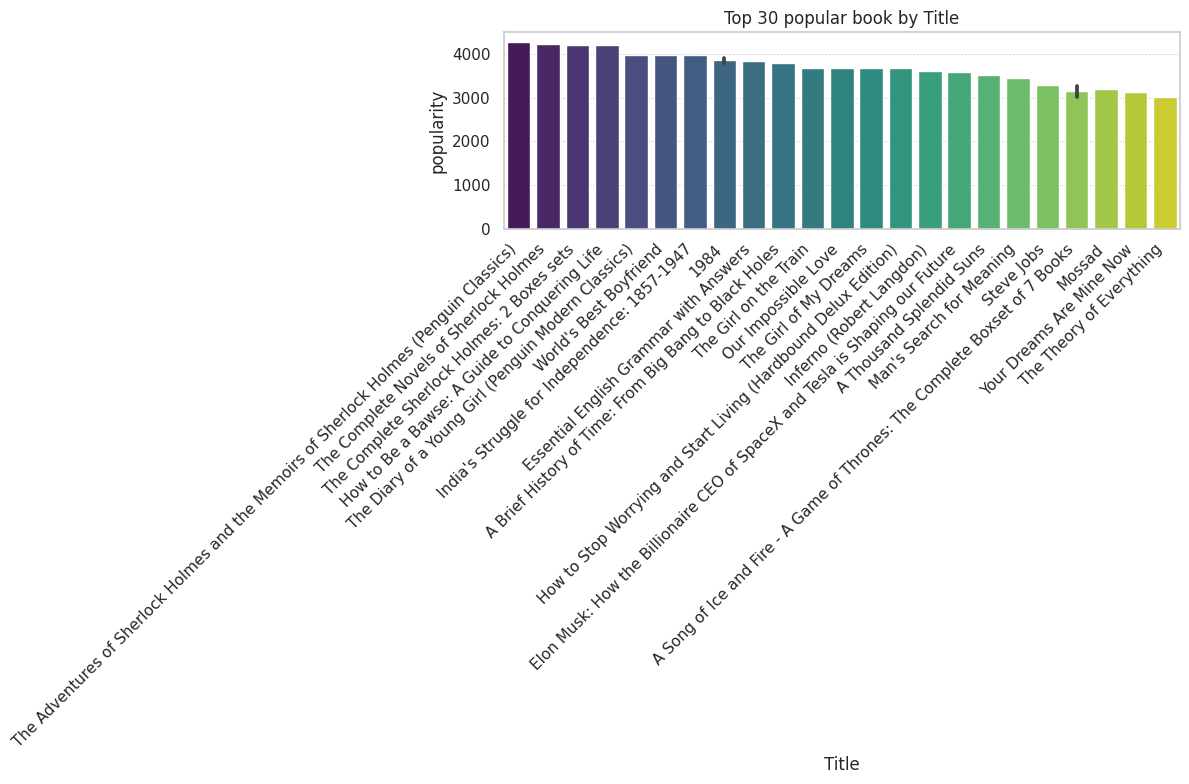

In [197]:
top_30 = df.nlargest(30, 'popularity')  # Select the top 30 values

plt.figure(figsize=(12, 8))

sns.barplot(x='Title', y='popularity', data=top_30, palette='viridis')

plt.title('Top 30 popular book by Title')
plt.xlabel('Title')
plt.ylabel('popularity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

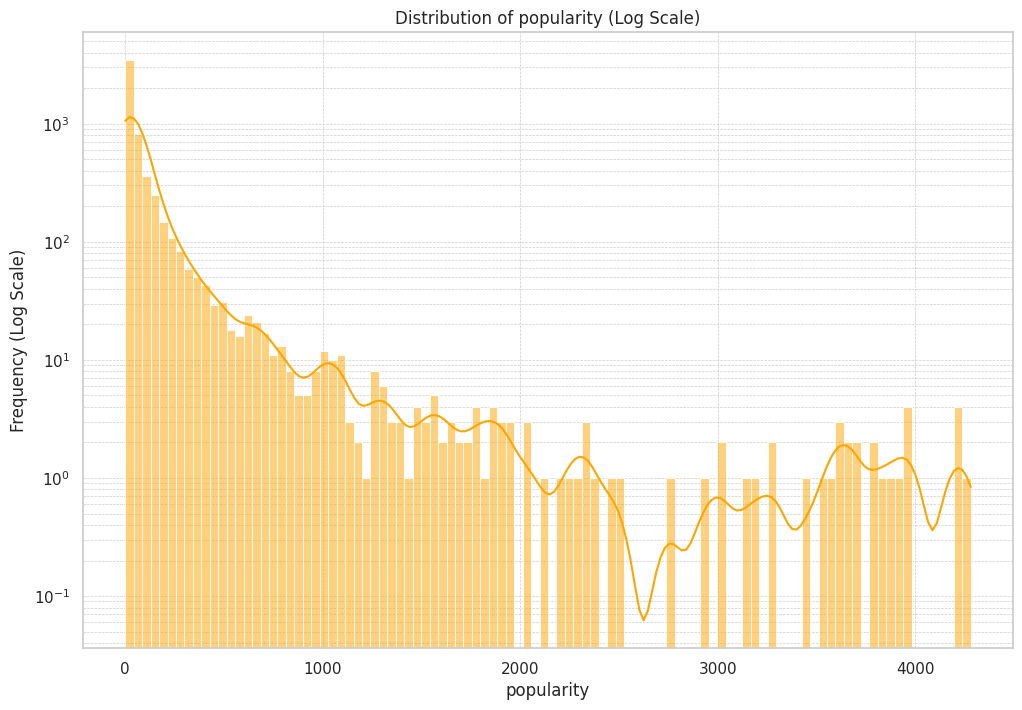

In [198]:
plt.figure(figsize=(12, 8))

sns.histplot(df['popularity'], bins=100, color='orange', kde=True, log_scale=(False, True))

plt.title('Distribution of popularity (Log Scale)')
plt.xlabel('popularity')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Basic Data Analysis

***----the most popular book----***

let’s see which book is the most popular (has the highest ratings and reviews score).
We calculate the product of Reviews_Score and Ratings_Number to find the most popular
book:

In [199]:
df['most_popular_book'] = df['Ratings_Number'] * df['Reviews_Score']
max_row = df.loc[df['most_popular_book'].idxmax()]
print(f'The most popular book: {max_row["Title"]}, most_popular_book: {max_row["most_popular_book"]}')

The most popular book: The Adventures of Sherlock Holmes and the Memoirs of Sherlock Holmes (Penguin Classics), most_popular_book: 4281.200000000001


The results show that The Adventures of Sherlock Holmes and the Memoirs of Sherlock
Holmes (Penguin Classics) has the highest popularity among all the other books in this
dataset

In [200]:
df.drop(columns=['most_popular_book'], inplace=True)

In [201]:
df.head(10)

,Title,Author,Reviews,Synopsis,BookCategory,Price,Reviews_Score,Edition_Date,Edition_Cover,Year,Year_Month,Ratings_Number,popularity
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,Action & Adventure,220.00,4.0,2016-03-10,Paperback,2016,2016-03,8,32.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,"Biographies, Diaries & True Accounts",202.93,3.9,2012-11-07,Paperback,2012,2012-11,14,54.6
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8 out of 5 stars,"""During the time men live without a common Pow...",Humour,299.00,4.8,1982-02-25,Paperback,1982,1982-02,6,28.8
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,"Crime, Thriller & Mystery",180.00,4.1,2017-10-05,Paperback,2017,2017-10,13,53.3
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...","Arts, Film & Photography",965.62,5.0,2006-10-10,Hardcover,2006,2006-10,1,5.0
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,4.5 out of 5 stars,The revised edition of the bestselling ChiRunn...,Sports,900.00,4.5,2009-05-05,Paperback,2009,2009-05,8,36.0
6,Death on the Nile (Poirot),Agatha Christie,4.4 out of 5 stars,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery",224.00,4.4,2017-10-05,Paperback,2017,2017-10,72,316.8
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,4.7 out of 5 stars,"Achieve a healthy body, mental alertness, and ...",Sports,836.00,4.7,NaT,Hardcover,2018,NaT,16,75.2
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,4.2 out of 5 stars,Karmayogi is the dramatic and inspiring story ...,"Biographies, Diaries & True Accounts",130.00,4.2,2015-12-15,Paperback,2015,2015-12,111,466.2
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,4.0 out of 5 stars,‘This is the original game of thrones’ George ...,Action & Adventure,695.00,4.0,2013-03-26,Paperback,2013,2013-03,1,4.0


***----most expensive covers----***

/tmp/ipykernel_48/3382259729.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Edition_Cover', y='Price', data=df, ci=None, color='pink')


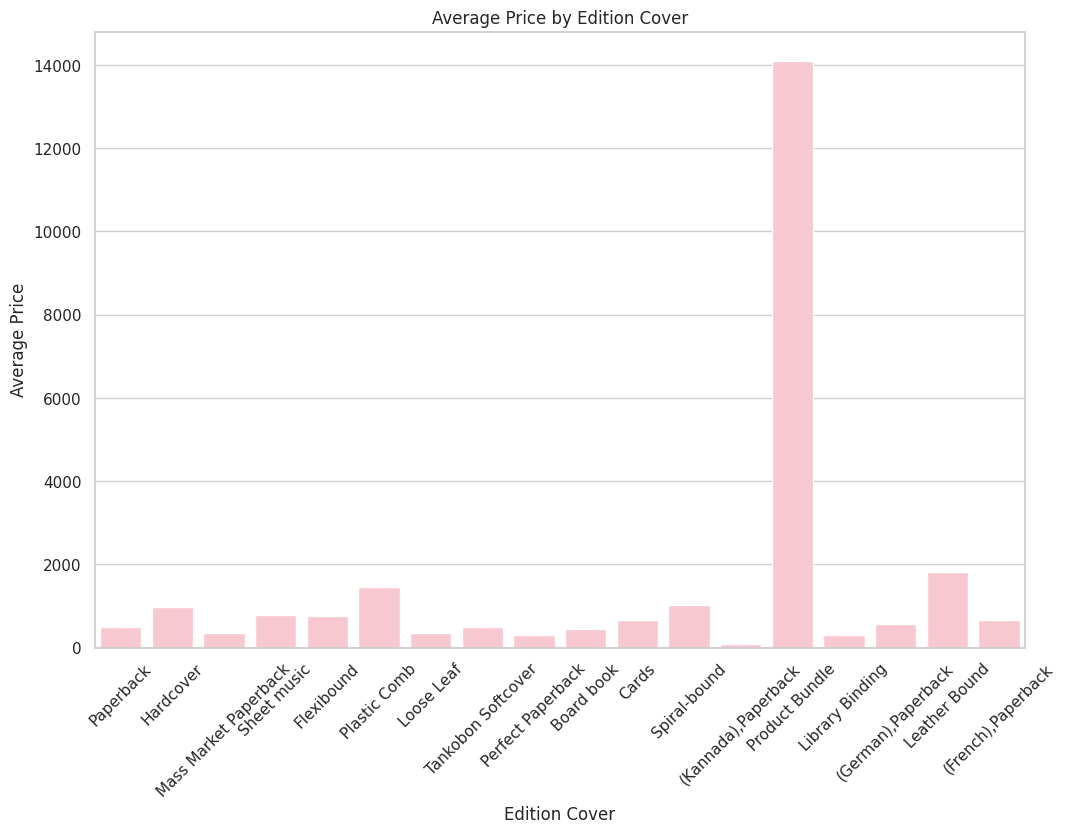

In [202]:
plt.figure(figsize=(12, 8))

# Use seaborn's barplot with a different color
sns.barplot(x='Edition_Cover', y='Price', data=df, ci=None, color='pink')

plt.title('Average Price by Edition Cover')
plt.xlabel('Edition Cover')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

***----correlation between the prices over the years----***

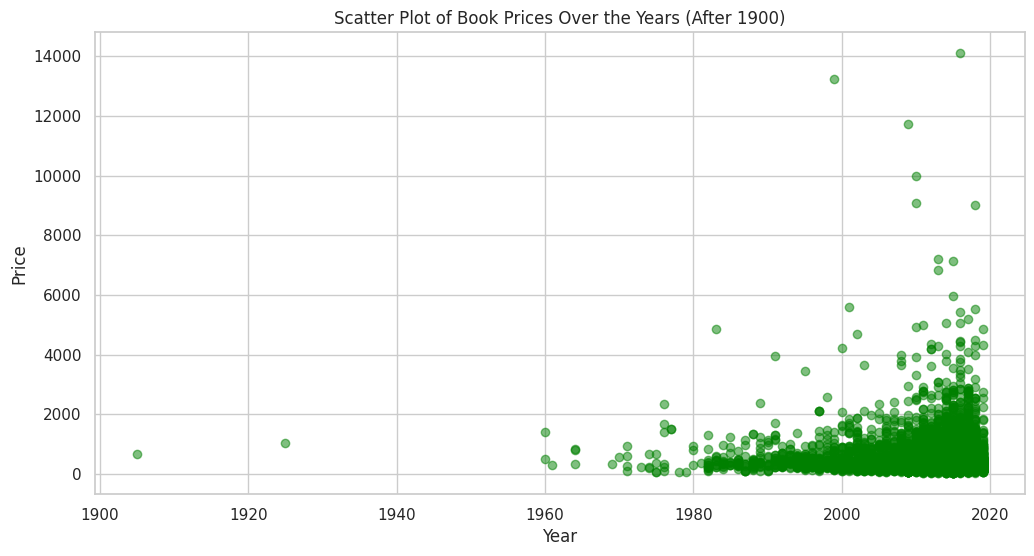

In [203]:
df_filtered = df[df['Year'] > 1900]

plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year'], df_filtered['Price'], color='green', alpha=0.5)
plt.title('Scatter Plot of Book Prices Over the Years (After 1900)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

***----Most popular Books----***

In [204]:
most_popular_book = df.loc[df['Ratings_Number'].idxmax()]
print(f"\nMost Popular Book:")
print(most_popular_book[['Title', 'Ratings_Number', 'Year', 'BookCategory']])


Most Popular Book:
Title             The Adventures of Sherlock Holmes and the Memo...
Ratings_Number                                                  973
Year                                                           2001
BookCategory                                     Action & Adventure
Name: 2550, dtype: object


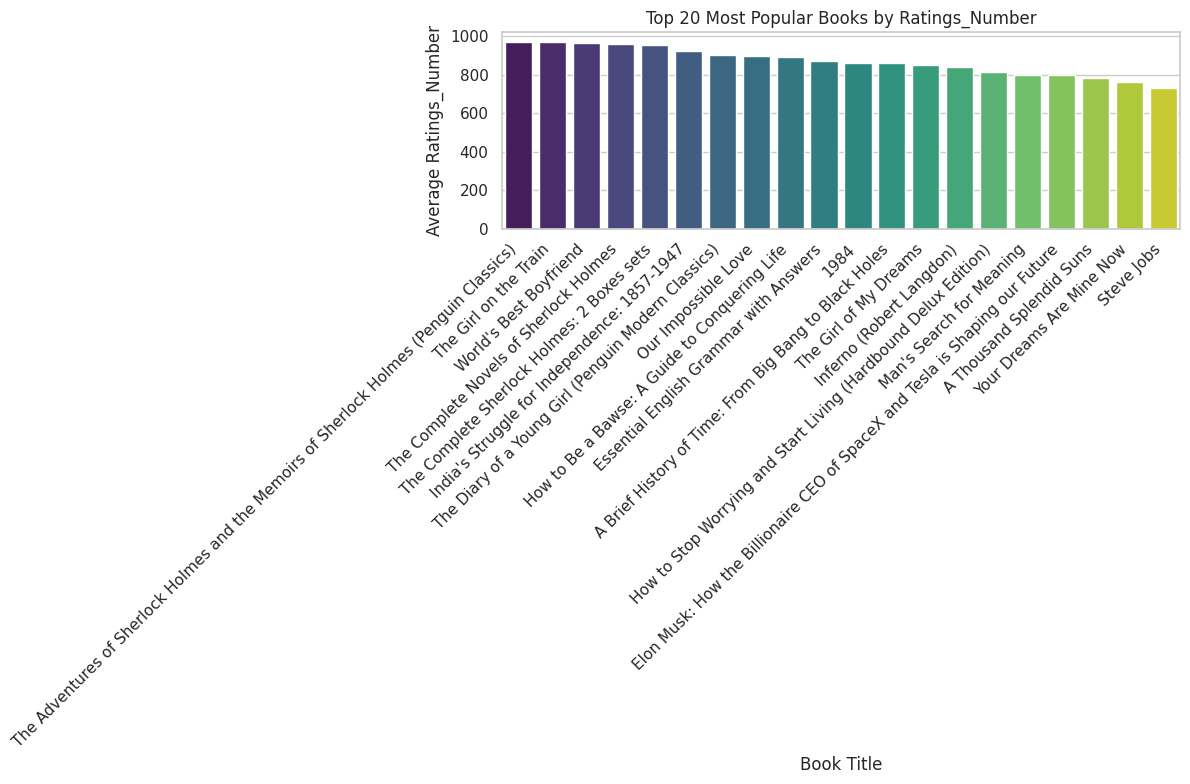

In [205]:
top_20_books = df.groupby('Title')['Ratings_Number'].mean().nlargest(20)

plt.figure(figsize=(12, 8))

# Use seaborn's barplot to show the top 20 most popular books by Ratings_Number
sns.barplot(x=top_20_books.index, y=top_20_books.values, palette='viridis')

plt.title('Top 20 Most Popular Books by Ratings_Number')
plt.xlabel('Book Title')
plt.ylabel('Average Ratings_Number')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


***----popular authors----***

In [206]:
author_ratings_sum = df.groupby('Author')['Ratings_Number'].sum()

top_authors = author_ratings_sum.sort_values(ascending=False).head(10)

print(top_authors)

Author
Dan Brown               5104
Durjoy Datta            4142
Novoneel Chakraborty    2638
Agatha Christie         2637
George Orwell           2606
Sudeep Nagarkar         2118
Sidney Sheldon          2104
Stephen Hawking         2096
Arthur Conan Doyle      2076
Anne Frank              1804
Name: Ratings_Number, dtype: int16


As you can see, the most popular author is Dan Brown.

let's see my favorite authors books:

In [207]:
target_author = 'Novoneel Chakraborty'
books_of_author = df[df['Author'] == target_author]
print(books_of_author[['Author', 'Title']])

                    Author                      Title
326   Novoneel Chakraborty            Black Suits You
1250  Novoneel Chakraborty         Marry Me, Stranger
1259  Novoneel Chakraborty  EX...A Twisted love Story
1478  Novoneel Chakraborty         Marry Me, Stranger
1739  Novoneel Chakraborty            Forever is True
2985  Novoneel Chakraborty           Forever is a Lie
3584  Novoneel Chakraborty                   Cheaters
3765  Novoneel Chakraborty           Half Torn Hearts
4280  Novoneel Chakraborty    Forget Me Not, Stranger
4510  Novoneel Chakraborty        All Yours, Stranger


# Feature Engineering

We did it in previous parts before.

# Feature transformation

In [208]:
#######################deleting some columns that we will not use anymore:

columns_to_drop = ['Reviews', 'Year_Month', 'Edition_Date', 'popularity']
df.drop(columns=columns_to_drop, inplace=True)

***----Encoding Edition_Cover and BookCategory columns----***

In [209]:
df_encoded = pd.get_dummies(df, columns=['Edition_Cover', 'BookCategory'], prefix=['Edition', 'Category'])

 This function is used to one-hot encode categorical columns in the DataFrame df. It creates binary columns for each category in the specified columns ('Edition_Cover' and 'BookCategory'), indicating the presence or absence of each category for each row.

In [210]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Title                                          5699 non-null   object 
 1   Author                                         5699 non-null   object 
 2   Synopsis                                       5699 non-null   object 
 3   Price                                          5699 non-null   float64
 4   Reviews_Score                                  5699 non-null   float64
 5   Year                                           5699 non-null   int64  
 6   Ratings_Number                                 5699 non-null   int16  
 7   Edition_(French),Paperback                     5699 non-null   bool   
 8   Edition_(German),Paperback                     5699 non-null   bool   
 9   Edition_(Kannada),Paperback                    5699 

The columns related to edition covers and book categories have been one-hot encoded, resulting in boolean columns indicating the presence or absence of each category or edition type for each entry.

The boolean columns resulting from one-hot encoding have a dtype of bool, which is an efficient representation for binary values.

In [211]:
df_encoded.head(10)

,Title,Author,Synopsis,Price,Reviews_Score,Year,Ratings_Number,"Edition_(French),Paperback","Edition_(German),Paperback","Edition_(Kannada),Paperback",...,"Category_Arts, Film & Photography","Category_Biographies, Diaries & True Accounts",Category_Comics & Mangas,"Category_Computing, Internet & Digital Media","Category_Crime, Thriller & Mystery",Category_Humour,"Category_Language, Linguistics & Writing",Category_Politics,Category_Romance,Category_Sports
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,THE HUNTERS return in their third brilliant no...,220.00,4.0,2016,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,A layered portrait of a troubled genius for wh...,202.93,3.9,2012,14,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,Leviathan (Penguin Classics),Thomas Hobbes,"""During the time men live without a common Pow...",299.00,4.8,1982,6,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,A handful of grain is found in the pocket of a...,180.00,4.1,2017,13,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"For seven decades, ""Life"" has been thrilling t...",965.62,5.0,2006,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,The revised edition of the bestselling ChiRunn...,900.00,4.5,2009,8,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,Death on the Nile (Poirot),Agatha Christie,Agatha Christie’s most exotic murder mystery\n...,224.00,4.4,2017,72,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Achieve a healthy body, mental alertness, and ...",836.00,4.7,2018,16,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,Karmayogi is the dramatic and inspiring story ...,130.00,4.2,2015,111,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,‘This is the original game of thrones’ George ...,695.00,4.0,2013,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


***----extract keywords----***

In [212]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def extracting_keywords(synopsis):
    words = word_tokenize(synopsis.lower())

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    unique_words = set(filtered_words)

    return unique_words

df_encoded['Keywords'] = df_encoded['Synopsis'].apply(extracting_keywords)

In this section, I've crafted a function named `extracting_keywords` to process textual synopses. Specifically, it tokenizes the input text, converts the words to lowercase, removes common stop words, and filters out non-alphanumeric words. The function then returns a set of unique words present in the processed synopsis. Subsequently, I've applied this function to the 'Synopsis' column. It creates a new column labeled 'Keywords.' Each entry in this 'Keywords' column now contains a set of unique words derived from the corresponding synopsis. This approach aims to condense and highlight essential terms, potentially facilitating further analysis or categorization based on the distinctive words present in each synopsis.

Here you can see the result:

In [213]:
df_encoded.head(10)

,Title,Author,Synopsis,Price,Reviews_Score,Year,Ratings_Number,"Edition_(French),Paperback","Edition_(German),Paperback","Edition_(Kannada),Paperback",...,"Category_Biographies, Diaries & True Accounts",Category_Comics & Mangas,"Category_Computing, Internet & Digital Media","Category_Crime, Thriller & Mystery",Category_Humour,"Category_Language, Linguistics & Writing",Category_Politics,Category_Romance,Category_Sports,Keywords
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,THE HUNTERS return in their third brilliant no...,220.00,4.0,2016,8,False,False,False,...,False,False,False,False,False,False,False,False,False,"{characters, marco, yet, kuzneski, danger, tra..."
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,A layered portrait of a troubled genius for wh...,202.93,3.9,2012,14,False,False,False,...,True,False,False,False,False,False,False,False,False,"{points, marathi, ke, compassion, deep, origin..."
2,Leviathan (Penguin Classics),Thomas Hobbes,"""During the time men live without a common Pow...",299.00,4.8,1982,6,False,False,False,...,False,False,False,False,True,False,False,False,False,"{read, disciplines, leading, based, 1651, scho..."
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,A handful of grain is found in the pocket of a...,180.00,4.1,2017,13,False,False,False,...,False,False,False,True,False,False,False,False,False,"{death, yet, pocket, financial, pockets, parlo..."
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"For seven decades, ""Life"" has been thrilling t...",965.62,5.0,2006,1,False,False,False,...,False,False,False,False,False,False,False,False,False,"{great, unforgettable, america, zestful, holly..."
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,The revised edition of the bestselling ChiRunn...,900.00,4.5,2009,8,False,False,False,...,False,False,False,False,False,False,False,False,True,"{run, disciplines, distance, deep, walking, ru..."
6,Death on the Nile (Poirot),Agatha Christie,Agatha Christie’s most exotic murder mystery\n...,224.00,4.4,2017,72,False,False,False,...,False,False,False,True,False,False,False,False,False,"{ridgeway, yet, agatha, girl, head, poirot, sh..."
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Achieve a healthy body, mental alertness, and ...",836.00,4.7,2018,16,False,False,False,...,False,False,False,False,False,False,False,False,True,"{recharge, stress, hatha, alertness, mindfulne..."
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,Karmayogi is the dramatic and inspiring story ...,130.00,4.2,2015,111,False,False,False,...,True,False,False,False,False,False,False,False,False,"{private, standards, sterling, sreedharan, pro..."
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,‘This is the original game of thrones’ George ...,695.00,4.0,2013,1,False,False,False,...,False,False,False,False,False,False,False,False,False,"{epic, governs, isabella, fair, stake, generat..."


***----Text Vectorization Strategies for Feature Extraction from Keywords in the Analysis----***

In [214]:
# Initialize the FeatureHasher
hasher = FeatureHasher(n_features=10, input_type='string')

# Transform the 'Keywords' column
keywords_hashed = hasher.transform(df_encoded['Keywords'])

# Convert the result to a DataFrame and concatenate it with the original DataFrame
df_hash_encoded = pd.concat([df_encoded, pd.DataFrame(keywords_hashed.toarray())], axis=1)

print(df_hash_encoded.head())

                                        Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                                            Synopsis   Price  Reviews_Score  \
0  THE HUNTERS return in their third brilliant no...  220.00            4.0   
1  A layered portrait of a troubled genius for wh...  202.93            3.9   
2  "During the time men live without a common Pow...  299.00            4.8   
3  A handful of grain is found in the pocket of a...  180.00            4.1   
4  For seven decades, "Life" has been thrilling t...  965.62            5.0   

   Year  Ratings_Number  Edition_(French),Paperback  \
0  2016               8                       False   
1  2012           

In this phase of the analysis, I explored various text vectorization techniques to extract meaningful features from the 'Keywords' column within the dataset. The initial step involved utilizing TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, resulting in a new DataFrame featuring TF-IDF features. This approach captures the significance of words in each synopsis while considering their frequency across all synopses.

Subsequently, I employed Count Vectorization, generating a matrix representing the frequency of each word in the 'Keywords' column. This technique provides a straightforward count-based representation, offering insights into the prominence of individual terms.

Lastly, I experimented with Feature Hashing, a method that transforms the 'Keywords' column into a fixed-size numerical representation. This approach is particularly useful for scenarios where the dimensionality of the data needs to be controlled.

Each of these vectorization techniques serves a unique purpose, providing diverse ways to represent textual data.

Moreover, the dataset includes key book information such as title, author, synopsis, price, reviews score, year of publication, and edition details. These features, alongside the newly derived textual representations, lay a solid foundation for subsequent analyses and modeling efforts.

***----Enhancing Author Representation through Multi-Label Binarization in the Dataset----***

In [215]:
df_encoded['Author'] = df_encoded['Author'].apply(lambda names: names.split(','))
mlb = MultiLabelBinarizer()
author_one_hot = pd.DataFrame(mlb.fit_transform(df_encoded['Author']), columns=mlb.classes_, index=df_encoded.index)
df_encoded = pd.concat([df_encoded, author_one_hot], axis=1)

In this phase of my analysis, I took a closer look at the 'Author' column in the dataset, aiming to enhance its representation for subsequent modeling and analysis. Initially, I employed a lambda function in combination with the `apply` method to split the author names, creating a list of authors for each book by considering comma separation. Subsequently, to effectively handle the multi-label nature of authorship, I transformed the author lists into a binary matrix, where each author's name is treated as a separate binary feature. The resulting one-hot encoded matrix, stored in the dataframe 'author_one_hot', was then seamlessly integrated with the original dataset. This augmentation not only preserves the integrity of the original author information but also introduces a structured binary representation.

In [216]:
df_encoded.head(10)

,Title,Author,Synopsis,Price,Reviews_Score,Year,Ratings_Number,"Edition_(French),Paperback","Edition_(German),Paperback","Edition_(Kannada),Paperback",...,Zia Mody,Ziauddin Sardar,Ziauddin Yousafzai,Zlatan Ibrahimovic,Zvi Kohavi,Zygmunt Miloszewski,dodie,r.h. Sin,renu and neena kaul,sister Jesme
0,The Prisoner's Gold (The Hunters 3),[Chris Kuzneski],THE HUNTERS return in their third brilliant no...,220.00,4.0,2016,8,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,[Arun Khopkar],A layered portrait of a troubled genius for wh...,202.93,3.9,2012,14,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),[Thomas Hobbes],"""During the time men live without a common Pow...",299.00,4.8,1982,6,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),[Agatha Christie],A handful of grain is found in the pocket of a...,180.00,4.1,2017,13,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,[Editors of Life],"For seven decades, ""Life"" has been thrilling t...",965.62,5.0,2006,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5,ChiRunning: A Revolutionary Approach to Effort...,[Danny Dreyer],The revised edition of the bestselling ChiRunn...,900.00,4.5,2009,8,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6,Death on the Nile (Poirot),[Agatha Christie],Agatha Christie’s most exotic murder mystery\n...,224.00,4.4,2017,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7,Yoga Your Home Practice Companion: A Complete ...,[Sivananda Yoga Vedanta Centre],"Achieve a healthy body, mental alertness, and ...",836.00,4.7,2018,16,False,False,False,...,0,0,0,0,0,0,0,0,0,0
8,Karmayogi: A Biography of E. Sreedharan,[M S Ashokan],Karmayogi is the dramatic and inspiring story ...,130.00,4.2,2015,111,False,False,False,...,0,0,0,0,0,0,0,0,0,0
9,"The Iron King (The Accursed Kings, Book 1)",[Maurice Druon],‘This is the original game of thrones’ George ...,695.00,4.0,2013,1,False,False,False,...,0,0,0,0,0,0,0,0,0,0


We convert Author to a list and one-hot encode it to convert it to a numerical feature.

***----Delete some features----***

After converting these features to numerical ones, now we can drop the Synopsis, Title and
Author from dataset. So all strings from the model will be removed.

In [217]:
df_encoded.drop(columns=['Title', 'Synopsis', 'Author', 'Keywords'], inplace=True)

# Modeling

***----Preparing dataset for machine learning model----***

In [218]:
target_column = 'Price'

X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4559, 3778)
y_train shape: (4559,)
X_test shape: (1140, 3778)
y_test shape: (1140,)


In this section, I prepared the dataset for machine learning model by defining the target column, 'Price,' and splitting the data into training and testing sets. The independent variables (features) are denoted as 'X,' and the dependent variable (target) is represented by 'y.' The dataset was divided into training and testing sets, with a test size of 20% and a random seed of 34 for reproducibility. The resulting shapes of the training and testing sets:
-------ax bezaram----
Now we can predict book prices based on the available features.

In [219]:
def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y (numpy.ndarray or pandas.Series): The target variable (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions(train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions(test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)
    mse_train = random_forest_regressor.score(X_train, y_train)
    
    y_pred = random_forest_regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)

    return mse_train, mse_test

In [220]:
mse_train, mse_test = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 0.8655436322517444 // Test mse is: 257169.36978007274


# Post processing

Now after all these steps, I want to do some post processing to get valuable insights and identifying the most important features. I want to do "Feature Importance Analysis" as posr processing.

In [228]:
post_processing_columns = ['Price', 'Year']

df2 = df[post_processing_columns].copy()

In [229]:
selected_column = 'Price'

X = df2.drop(selected_column, axis=1)
y = df2[selected_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5129, 1)
y_train shape: (5129,)
X_test shape: (570, 1)
y_test shape: (570,)


In [230]:
mse_train, mse_test = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 0.02074555211269169 // Test mse is: 345031.00525915547


In [223]:
post_processing_columns = ['Price', 'Year', 'Reviews_Score', 'Ratings_Number']

df2 = df[post_processing_columns].copy()

In [225]:
selected_column = 'Price'

X = df2.drop(selected_column, axis=1)
y = df2[selected_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5129, 3)
y_train shape: (5129,)
X_test shape: (570, 3)
y_test shape: (570,)


In [226]:
mse_train, mse_test = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 0.4951393638222812 // Test mse is: 331667.8687420133


In [233]:
post_processing_columns = ['Price', 'Edition_Cover', 'BookCategory']

df2 = df[post_processing_columns].copy()
df2 = pd.get_dummies(df2, columns=['Edition_Cover', 'BookCategory'], prefix=['Edition', 'Category'])

In [234]:
post_processing_columns = 'Price'

X = df2.drop(post_processing_columns, axis=1)
y = df2[post_processing_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5129, 29)
y_train shape: (5129,)
X_test shape: (570, 29)
y_test shape: (570,)


In [235]:
mse_train, mse_test = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 0.22216659453192844 // Test mse is: 280734.45774330996
